* 'import librarys'

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import os 
import pickle

# import clean text data
import re
import html
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string 
import unicodedata
import nltk

# تحميل البيانات اللازمة
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# from scipy.sparse import hstack


# imblearn
from imblearn.over_sampling import SMOTE

#Dat_preprocssing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import Word2Vec

#Models
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
#Evaluate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIROO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Using pandas
FILE_PATH = os.path.join(os.getcwd(), 'Womens Clothing E-Commerce Reviews.csv')
df = pd.read_csv(FILE_PATH)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


* EDA

In [3]:
# to know the shape of dataset
df.shape

(23486, 11)

In [4]:
# check null in dataset
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
#dropping unwanted columns

df.drop(columns=['Clothing ID','Title','Unnamed: 0'],axis=1,inplace=True)

In [8]:
df[df['Review Text'].isnull()]

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,23,NaN,5,1,0,General Petite,Tops,Knits
93,31,NaN,5,1,0,General,Dresses,Dresses
98,50,NaN,5,1,0,General,Jackets,Outerwear
135,35,NaN,4,1,0,General Petite,Tops,Knits
142,35,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...
23258,35,NaN,4,1,0,General,Tops,Knits
23301,52,NaN,5,1,0,General,Tops,Knits
23303,46,NaN,5,1,0,General,Tops,Blouses
23470,39,NaN,5,1,0,General Petite,Dresses,Dresses


In [9]:
#Dropping rows which have null values

df =df.dropna(subset=['Review Text'])
df =df.dropna(subset=['Division Name'])
df =df.dropna(subset=['Department Name'])
df =df.dropna(subset=['Class Name'])

In [10]:
#check again shape
df.shape

(22628, 8)

In [11]:
#check again null values
df.isnull().sum()               

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

## Visuliaztion

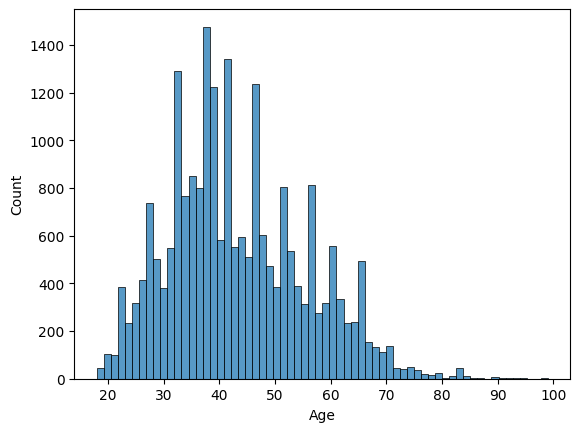

In [12]:
sns.histplot(data=df,x='Age')
plt.show()

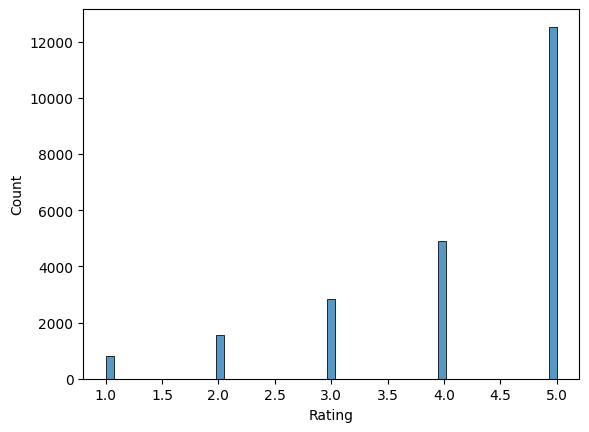

In [13]:
sns.histplot(data=df,x='Rating')
plt.show()

In [14]:
px.histogram(df, x ='Class Name')


In [15]:
px.histogram(df, x ='Department Name')


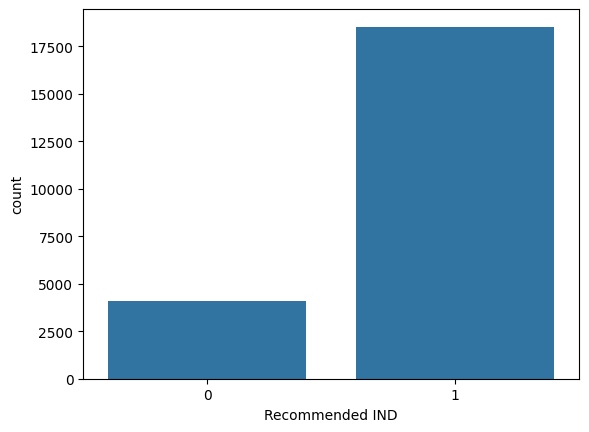

In [16]:
sns.countplot(data=df,x='Recommended IND')
plt.show()

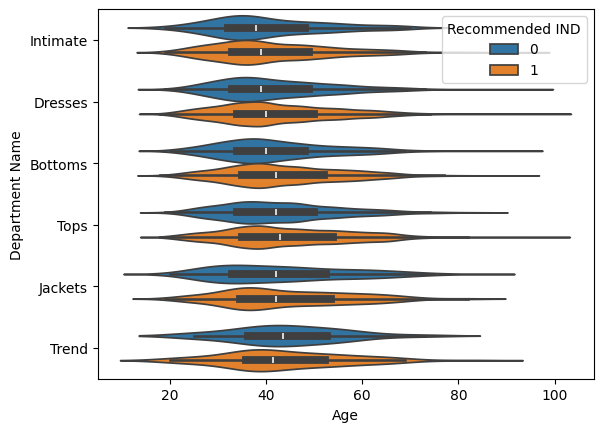

In [17]:
sns.violinplot(data=df,x='Age',y='Department Name',hue='Recommended IND')
plt.show()

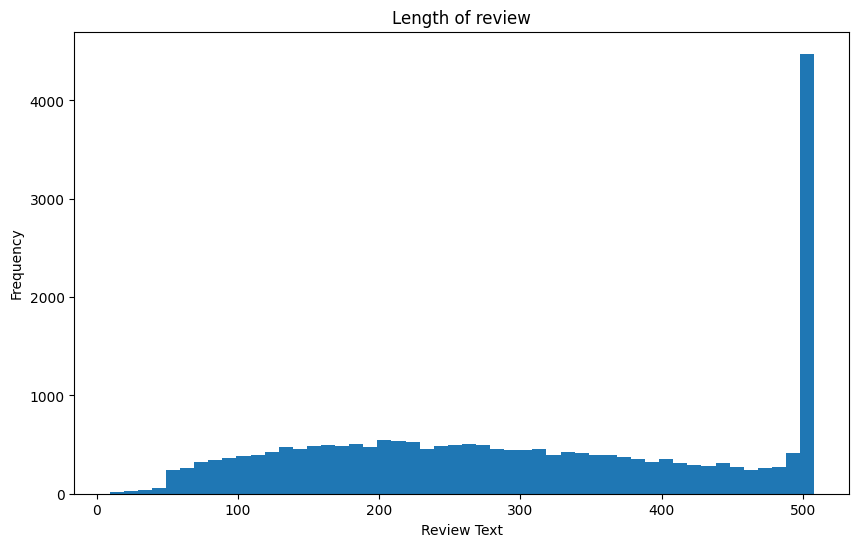

In [18]:
length_review = df['Review Text'].str.len()
## Plotting
plt.figure(figsize=(10, 6))
plt.hist(length_review, bins=50)
plt.title('Length of review')
plt.xlabel('Review Text')
plt.ylabel('Frequency')
plt.show()

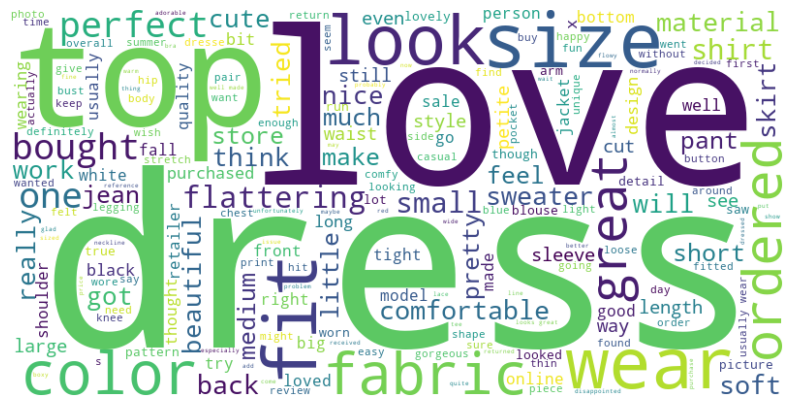

In [19]:
# merge all text in only text to create wordcloude
all_text = ' '.join(df['Review Text'].astype(str))

#to see more repeat word in curpus
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Cleaning the text data

In [20]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]



def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words)
    words = stem_words(words)


    return ' '.join(words)

In [21]:
#Apply function
df['Review Text'] = df['Review Text'].apply(normalize_text)

In [22]:
df['Review Text']

0                        absolut wonder silki sexi comfort
1        love dress sooo pretti happen find store im gl...
2        high hope dress realli want work initi order p...
3        love love love jumpsuit fun flirti fabul everi...
4        shirt flatter due adjust front tie perfect len...
                               ...                        
23481    happi snag dress great price easi slip flatter...
23482    remind matern cloth soft stretchi shini materi...
23483    fit well top see never would work im glad abl ...
23484    bought dress wed summer cute unfortun fit isnt...
23485    dress love platinum feminin fit perfectli easi...
Name: Review Text, Length: 22628, dtype: object

### toknization

In [23]:
## Tokenization
tokenized_tweet = df['Review Text'].apply(lambda x: x.split()) 
tokenized_tweet.head()

0              [absolut, wonder, silki, sexi, comfort]
1    [love, dress, sooo, pretti, happen, find, stor...
2    [high, hope, dress, realli, want, work, initi,...
3    [love, love, love, jumpsuit, fun, flirti, fabu...
4    [shirt, flatter, due, adjust, front, tie, perf...
Name: Review Text, dtype: object

# TFIDF


In [24]:
# تأكد من أن `tfidf_vectorizer` يحتوي على نفس عدد المميزات الذي يتوقعه النموذج
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=None, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['Review Text'])
X_tfidf = X_tfidf.toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13406739, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
# to know number of Features
num_features_vectorizer = len(tfidf_vectorizer.get_feature_names_out())
print(f"Number of features in updated TF-IDF Vectorizer: {num_features_vectorizer}")

Number of features in updated TF-IDF Vectorizer: 6045


In [26]:
# convert X_tfidf to DataFrame
tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf_vectorizer.get_feature_names_out())

In [27]:
#slice data to X&y
X=tfidf_df
y=df['Recommended IND']

In [28]:
#split data to train & test
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2)

In [29]:
# to know shape train & test
print("X_train  ",X_train.shape)
print("y_train  ",y_train.shape)
print("X_test   ",X_test.shape)
print("y_test   " ,y_test.shape)

X_train   (18102, 6045)
y_train   (18102,)
X_test    (4526, 6045)
y_test    (4526,)


* `Dealing with Imbalancing Data`

* using SMOTE

In [30]:
# 3. Consider using oversampling using SMOTE   --- (X_train_resampeld, y_train_resampled)
over = SMOTE(sampling_strategy=0.7)
X_train_resampeld, y_train_resampled = over.fit_resample(X_train, y_train)

### check data after SMOTE

In [31]:
#Before smote
print(y_train.value_counts())

#After smote
print(y_train_resampled.value_counts())

Recommended IND
1    14788
0     3314
Name: count, dtype: int64
Recommended IND
1    14788
0    10351
Name: count, dtype: int64


* Evalute F1_score

### Build a model

* Using Extraa Tree Classifier

In [33]:
# إنشاء نموذج Multinomial Naive Bayes مع تخصيص المعاملات
nb_model = MultinomialNB(alpha=0.1, fit_prior=False)

# تدريب النموذج
nb_model.fit(X_train_resampeld, y_train_resampled)


# التنبؤ بالنتائج على مجموعة الاختبار
y_pred_train=nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

# F1-Score
f1_train_log = f1_score(y_train, y_pred_train)
f1_test_log = f1_score(y_test, y_pred_test)

print(f'The f1_score using Naivebias for Training Dataset is: {f1_train_log*100:.3f}')
print(f'The f1_score using Naivebias for Testing Dataset is: {f1_test_log*100:.3f}')




The f1_score using Naivebias for Training Dataset is: 92.417
The f1_score using Naivebias for Testing Dataset is: 90.267


### Dump model

In [47]:
with open('model_with_vectorizer.pkl', 'wb') as file:
    pickle.dump((nb_model,tfidf_vectorizer), file)